 # <center> 4th goal: cleaning and sentiment analysis of the lyrics</center>

# 0. Import

In [47]:
import pandas as pd

#regex
import re

#NLTK
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

#TextBlob
from textblob import TextBlob

#SpaCy
import spacy
from spacy import displacy

#Others
#import speech_recognition as sr #sudo pip3 install --upgrade speechrecognition
#import pyaudio

In [48]:
from sentiment_analysis_spanish import sentiment_analysis #https://pypi.org/project/sentiment-analysis-spanish/

## 1. Some cleaning

In [49]:
df = pd.read_csv("output/playlist_with_lyrics.csv")
df.head()

,ironhacker,song,artist,lyrics
0,soyungalgo,Mi danza (feat. Dani de Morón),Fuel Fandango,"[Letra de ""Mi Danza""]\n\n[Verso 1]\nDeja que l..."
1,soyungalgo,MERICHANE,Zahara,"[Letra de ""MERICHANE""]\n\n[Estrofa 1]\nYo esta..."
2,toni085,Olaf el vikingo,LOS NIKIS,Todos en la tribu le tienen miedo\nOlaf el vik...
3,ferqwertyuiop,So So,Rusowsky,[Intro]\nFl-Fl-Flex Lennon\n\n[Chorus]\nPropos...
4,1182774545,WTF Is In My Cup,Chico Blanco,"[Letra de ""WTF Is In My Cup""]\n\n[Estribillo]\..."


### 1.1. Remove bracketed text

#### Defining a regex pattern

In [50]:
pattern = "\[(.*?)\]"
string = ""
quitar_corchetes = re.sub(pattern, "", string)

#### Making it a function

In [51]:
def quitar_corchetes (string):
    pattern = "(\[(.*?)\])"
    sin_corchetes = re.sub(pattern, "", string)
    return sin_corchetes

#### Applying it to a column

In [52]:
df['letra sin corchetes'] = df.lyrics.apply(quitar_corchetes)
df.head()

,ironhacker,song,artist,lyrics,letra sin corchetes
0,soyungalgo,Mi danza (feat. Dani de Morón),Fuel Fandango,"[Letra de ""Mi Danza""]\n\n[Verso 1]\nDeja que l...",\n\n\nDeja que la vida brote\nDonde menos te l...
1,soyungalgo,MERICHANE,Zahara,"[Letra de ""MERICHANE""]\n\n[Estrofa 1]\nYo esta...",\n\n\nYo estaba ahí cuando todos bailaban\nMoj...
2,toni085,Olaf el vikingo,LOS NIKIS,Todos en la tribu le tienen miedo\nOlaf el vik...,Todos en la tribu le tienen miedo\nOlaf el vik...
3,ferqwertyuiop,So So,Rusowsky,[Intro]\nFl-Fl-Flex Lennon\n\n[Chorus]\nPropos...,"\nFl-Fl-Flex Lennon\n\n\nPropose a toast, you ..."
4,1182774545,WTF Is In My Cup,Chico Blanco,"[Letra de ""WTF Is In My Cup""]\n\n[Estribillo]\...",\n\n\nWhat the fuck is in my cup? I don't even...


In [53]:
df = df.drop(['lyrics'], axis=1)

In [54]:
df.head()

,ironhacker,song,artist,letra sin corchetes
0,soyungalgo,Mi danza (feat. Dani de Morón),Fuel Fandango,\n\n\nDeja que la vida brote\nDonde menos te l...
1,soyungalgo,MERICHANE,Zahara,\n\n\nYo estaba ahí cuando todos bailaban\nMoj...
2,toni085,Olaf el vikingo,LOS NIKIS,Todos en la tribu le tienen miedo\nOlaf el vik...
3,ferqwertyuiop,So So,Rusowsky,"\nFl-Fl-Flex Lennon\n\n\nPropose a toast, you ..."
4,1182774545,WTF Is In My Cup,Chico Blanco,\n\n\nWhat the fuck is in my cup? I don't even...


# 2. Tokenization

`RegexpTokenizer(r'\w+')` <br>
`tokenizer.tokenize(string)`

In [55]:
#Donwload tokenizer from NLTK
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/breogann/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Tokenizing just one cell


In [56]:
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(df.iloc[0]['letra sin corchetes'])
tokens

['Deja',
 'que',
 'la',
 'vida',
 'brote',
 'Donde',
 'menos',
 'te',
 'lo',
 'esperas',
 'Deja',
 'que',
 'se',
 'abra',
 'camino',
 'Y',
 'trepe',
 'como',
 'enredadera',
 'Deja',
 'que',
 'me',
 'lleve',
 'el',
 'aire',
 'Hacia',
 'un',
 'futuro',
 'nuevo',
 'Deja',
 'que',
 'vuelva',
 'al',
 'origen',
 'Y',
 'que',
 'desaparezca',
 'el',
 'miedo',
 'Que',
 'empiece',
 'la',
 'parranda',
 'El',
 'jaleo',
 'que',
 'me',
 'abraza',
 'Olé',
 'chiquilla',
 'Este',
 'compás',
 'que',
 'arrasa',
 'Mi',
 'danza',
 'mi',
 'danza',
 'mi',
 'danza',
 'El',
 'jaleo',
 'que',
 'me',
 'abraza',
 'Mi',
 'danza',
 'mi',
 'danza',
 'mi',
 'danza',
 'mi',
 'danza',
 'Deja',
 'mis',
 'semillas',
 'brotar',
 'brillar',
 'Ya',
 'no',
 'soy',
 'como',
 'era',
 'Abro',
 'la',
 'puerta',
 'de',
 'par',
 'en',
 'par',
 'Cantaré',
 'hasta',
 'el',
 'día',
 'que',
 'me',
 'muera',
 'Deja',
 'que',
 'me',
 'salgan',
 'alas',
 'Déjame',
 'volar',
 'del',
 'nido',
 'Deja',
 'que',
 'vuelva',
 'al',
 'origen',
 

#### Same but in a function

In [57]:
def tokenize (string):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(string)
    return tokens

In [58]:
df['tokenizao'] = df['letra sin corchetes'].apply(tokenize)
df.head()

,ironhacker,song,artist,letra sin corchetes,tokenizao
0,soyungalgo,Mi danza (feat. Dani de Morón),Fuel Fandango,\n\n\nDeja que la vida brote\nDonde menos te l...,"[Deja, que, la, vida, brote, Donde, menos, te,..."
1,soyungalgo,MERICHANE,Zahara,\n\n\nYo estaba ahí cuando todos bailaban\nMoj...,"[Yo, estaba, ahí, cuando, todos, bailaban, Moj..."
2,toni085,Olaf el vikingo,LOS NIKIS,Todos en la tribu le tienen miedo\nOlaf el vik...,"[Todos, en, la, tribu, le, tienen, miedo, Olaf..."
3,ferqwertyuiop,So So,Rusowsky,"\nFl-Fl-Flex Lennon\n\n\nPropose a toast, you ...","[Fl, Fl, Flex, Lennon, Propose, a, toast, you,..."
4,1182774545,WTF Is In My Cup,Chico Blanco,\n\n\nWhat the fuck is in my cup? I don't even...,"[What, the, fuck, is, in, my, cup, I, don, t, ..."


In [59]:
df['tokenizao'] = df['tokenizao'].apply(lambda x: " ".join(x))
df.head()

,ironhacker,song,artist,letra sin corchetes,tokenizao
0,soyungalgo,Mi danza (feat. Dani de Morón),Fuel Fandango,\n\n\nDeja que la vida brote\nDonde menos te l...,Deja que la vida brote Donde menos te lo esper...
1,soyungalgo,MERICHANE,Zahara,\n\n\nYo estaba ahí cuando todos bailaban\nMoj...,Yo estaba ahí cuando todos bailaban Mojaban el...
2,toni085,Olaf el vikingo,LOS NIKIS,Todos en la tribu le tienen miedo\nOlaf el vik...,Todos en la tribu le tienen miedo Olaf el viki...
3,ferqwertyuiop,So So,Rusowsky,"\nFl-Fl-Flex Lennon\n\n\nPropose a toast, you ...",Fl Fl Flex Lennon Propose a toast you know Mad...
4,1182774545,WTF Is In My Cup,Chico Blanco,\n\n\nWhat the fuck is in my cup? I don't even...,What the fuck is in my cup I don t even know B...


## 3. Translating 

### textblob

`language_1 = TextBlob(u'la_string')`<br>
`language_2 = language_1.translate()`

In [60]:
#Translating
spanish_string = TextBlob(u'que tengas buen buen day')
english_blob=spanish_string.translate(from_lang='es',to='en')
english_blob

TextBlob("have a good day")

In [61]:
def intoEnglish(string):
    spanish_string = TextBlob(string)
    try:
        english_blob=spanish_string.translate(from_lang='es',to='en')
        return "".join(list(english_blob))
    except:
        return string

In [62]:
df['ingles'] = df.tokenizao.apply(intoEnglish)

In [63]:
df.head()

,ironhacker,song,artist,letra sin corchetes,tokenizao,ingles
0,soyungalgo,Mi danza (feat. Dani de Morón),Fuel Fandango,\n\n\nDeja que la vida brote\nDonde menos te l...,Deja que la vida brote Donde menos te lo esper...,Let life sprout Where you least expect it Let ...
1,soyungalgo,MERICHANE,Zahara,\n\n\nYo estaba ahí cuando todos bailaban\nMoj...,Yo estaba ahí cuando todos bailaban Mojaban el...,I was there when everyone was dancing They wet...
2,toni085,Olaf el vikingo,LOS NIKIS,Todos en la tribu le tienen miedo\nOlaf el vik...,Todos en la tribu le tienen miedo Olaf el viki...,Everyone in the tribe is afraid of him Olaf th...
3,ferqwertyuiop,So So,Rusowsky,"\nFl-Fl-Flex Lennon\n\n\nPropose a toast, you ...",Fl Fl Flex Lennon Propose a toast you know Mad...,Fl Fl Flex Lennon Propose a toast you know Mad...
4,1182774545,WTF Is In My Cup,Chico Blanco,\n\n\nWhat the fuck is in my cup? I don't even...,What the fuck is in my cup I don t even know B...,What the fuck is in my cup I don t even know B...


## 4. Stop words

In [64]:
nltk.download('stopwords') #stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/breogann/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [65]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'until', 'ma', 'what', 'when', 'd', "mightn't", "hasn't", 'couldn', 'be', 'those', 'am', 'below', 'by', 'are', 'very', 'if', 'under', 'few', 'then', 'a', 'same', 'too', 'than', 'will', 'yourselves', 'why', "hadn't", 'not', 'whom', "weren't", "you're", 'for', 'yours', 'out', 'he', "that'll", 'she', 'once', 'both', "didn't", 'me', 'own', 'his', 'having', 'hadn', 'hasn', 'most', "you'll", 'her', 'has', 'their', 'were', 'they', 'mightn', 'where', 've', 'off', 'have', 'do', 'as', 'himself', 'on', 'who', 'the', 'doesn', 'was', 're', 'an', "shouldn't", 'these', 'ain', 'after', 'above', 'how', 'or', "you'd", 's', "wouldn't", 'your', 'shouldn', 't', 'before', 'again', 'about', 'we', 'don', 'shan', 'just', 'ourselves', "don't", 'of', 'you', 'him', 'that', 'does', 'this', 'isn', 'because', 'into', 'other', 'themselves', "wasn't", 'so', "won't", 'll', 'won', 'all', 'herself', 'o', 'y', "shan't", 'i', 'theirs', 'here', 'doing', 'between', 'and', 'from', 'ours', 'yourself', 'to', 'against', 'over',

In [66]:
df.ingles = df.ingles.apply(lambda x: x.split(" "))

In [67]:
df.head()

,ironhacker,song,artist,letra sin corchetes,tokenizao,ingles
0,soyungalgo,Mi danza (feat. Dani de Morón),Fuel Fandango,\n\n\nDeja que la vida brote\nDonde menos te l...,Deja que la vida brote Donde menos te lo esper...,"[Let, life, sprout, Where, you, least, expect,..."
1,soyungalgo,MERICHANE,Zahara,\n\n\nYo estaba ahí cuando todos bailaban\nMoj...,Yo estaba ahí cuando todos bailaban Mojaban el...,"[I, was, there, when, everyone, was, dancing, ..."
2,toni085,Olaf el vikingo,LOS NIKIS,Todos en la tribu le tienen miedo\nOlaf el vik...,Todos en la tribu le tienen miedo Olaf el viki...,"[Everyone, in, the, tribe, is, afraid, of, him..."
3,ferqwertyuiop,So So,Rusowsky,"\nFl-Fl-Flex Lennon\n\n\nPropose a toast, you ...",Fl Fl Flex Lennon Propose a toast you know Mad...,"[Fl, Fl, Flex, Lennon, Propose, a, toast, you,..."
4,1182774545,WTF Is In My Cup,Chico Blanco,\n\n\nWhat the fuck is in my cup? I don't even...,What the fuck is in my cup I don t even know B...,"[What, the, fuck, is, in, my, cup, I, don, t, ..."


In [68]:
def stop_words (lista):
    stop_words = set(stopwords.words('english'))
    nueva_lista = []
    for string in lista:
        if string not in stop_words:
            nueva_lista.append(string)
    return " ".join(nueva_lista)

In [69]:
df.ingles = df.ingles.apply(stop_words)
df.head()

,ironhacker,song,artist,letra sin corchetes,tokenizao,ingles
0,soyungalgo,Mi danza (feat. Dani de Morón),Fuel Fandango,\n\n\nDeja que la vida brote\nDonde menos te l...,Deja que la vida brote Donde menos te lo esper...,Let life sprout Where least expect Let make wa...
1,soyungalgo,MERICHANE,Zahara,\n\n\nYo estaba ahí cuando todos bailaban\nMoj...,Yo estaba ahí cuando todos bailaban Mojaban el...,I everyone dancing They wet finger thought ete...
2,toni085,Olaf el vikingo,LOS NIKIS,Todos en la tribu le tienen miedo\nOlaf el vik...,Todos en la tribu le tienen miedo Olaf el viki...,Everyone tribe afraid Olaf Viking cold ice The...
3,ferqwertyuiop,So So,Rusowsky,"\nFl-Fl-Flex Lennon\n\n\nPropose a toast, you ...",Fl Fl Flex Lennon Propose a toast you know Mad...,Fl Fl Flex Lennon Propose toast know Made high...
4,1182774545,WTF Is In My Cup,Chico Blanco,\n\n\nWhat the fuck is in my cup? I don't even...,What the fuck is in my cup I don t even know B...,What fuck cup I even know But I drink drink dr...


## 5. Sentiment analysis

#### 5.1.1. Textblob

`TextBlob(the_string).sentiment`

**Args:** `string`<br>
**Returns:** `polarity`& `subjectivity`

In [70]:
the_string = "i hate it here"

In [71]:
blob = TextBlob(the_string)
blob.sentiment

Sentiment(polarity=-0.8, subjectivity=0.9)

#### 5.1.2. NLTK

`sia.polarity_scores(the_string)`

**Args:** `string`<br>
**Returns:** `polarity`

In [72]:
sia = SentimentIntensityAnalyzer()

In [73]:
sentence = "this is beautiful"

In [74]:
polarity = sia.polarity_scores(sentence)

In [75]:
polarity

{'neg': 0.0, 'neu': 0.339, 'pos': 0.661, 'compound': 0.5994}

In [76]:
def sentimentAnalysis(sentence):
    sia = SentimentIntensityAnalyzer()
    polarity = sia.polarity_scores(sentence)
    pol = polarity['compound']
    return pol

In [77]:
sentimentAnalysis(sentence)

0.5994

In [79]:
df['sentiment_compound'] = df.ingles.apply(sentimentAnalysis)
df.head()

,ironhacker,song,artist,letra sin corchetes,tokenizao,ingles,sentiment_compound
0,soyungalgo,Mi danza (feat. Dani de Morón),Fuel Fandango,\n\n\nDeja que la vida brote\nDonde menos te l...,Deja que la vida brote Donde menos te lo esper...,Let life sprout Where least expect Let make wa...,0.7506
1,soyungalgo,MERICHANE,Zahara,\n\n\nYo estaba ahí cuando todos bailaban\nMoj...,Yo estaba ahí cuando todos bailaban Mojaban el...,I everyone dancing They wet finger thought ete...,0.8275
2,toni085,Olaf el vikingo,LOS NIKIS,Todos en la tribu le tienen miedo\nOlaf el vik...,Todos en la tribu le tienen miedo Olaf el viki...,Everyone tribe afraid Olaf Viking cold ice The...,-0.9801
3,ferqwertyuiop,So So,Rusowsky,"\nFl-Fl-Flex Lennon\n\n\nPropose a toast, you ...",Fl Fl Flex Lennon Propose a toast you know Mad...,Fl Fl Flex Lennon Propose toast know Made high...,0.8670
4,1182774545,WTF Is In My Cup,Chico Blanco,\n\n\nWhat the fuck is in my cup? I don't even...,What the fuck is in my cup I don t even know B...,What fuck cup I even know But I drink drink dr...,0.8316


### Other libraries: 🇪🇸 sentiment_analysis

In [ ]:
sentiment = sentiment_analysis.SentimentAnalysisSpanish()
print(sentiment.sentiment("me gusta la tombola es genial"))

In [ ]:
def sentiment_spanish(x):
    return sentiment.sentiment(x)

In [ ]:
#Now into a function

def traducir (string):
    texto = TextBlob(f'{string}')
    try:
        traduccion = texto.translate(to='en')
        return traduccion
    except:
        sentiment_spanish(string)

# 6. DF

In [80]:
df.head()

,ironhacker,song,artist,letra sin corchetes,tokenizao,ingles,sentiment_compound
0,soyungalgo,Mi danza (feat. Dani de Morón),Fuel Fandango,\n\n\nDeja que la vida brote\nDonde menos te l...,Deja que la vida brote Donde menos te lo esper...,Let life sprout Where least expect Let make wa...,0.7506
1,soyungalgo,MERICHANE,Zahara,\n\n\nYo estaba ahí cuando todos bailaban\nMoj...,Yo estaba ahí cuando todos bailaban Mojaban el...,I everyone dancing They wet finger thought ete...,0.8275
2,toni085,Olaf el vikingo,LOS NIKIS,Todos en la tribu le tienen miedo\nOlaf el vik...,Todos en la tribu le tienen miedo Olaf el viki...,Everyone tribe afraid Olaf Viking cold ice The...,-0.9801
3,ferqwertyuiop,So So,Rusowsky,"\nFl-Fl-Flex Lennon\n\n\nPropose a toast, you ...",Fl Fl Flex Lennon Propose a toast you know Mad...,Fl Fl Flex Lennon Propose toast know Made high...,0.8670
4,1182774545,WTF Is In My Cup,Chico Blanco,\n\n\nWhat the fuck is in my cup? I don't even...,What the fuck is in my cup I don t even know B...,What fuck cup I even know But I drink drink dr...,0.8316


In [81]:
resumen = df.groupby(['ironhacker'])['sentiment_compound'].mean().sort_values()
resumen

ironhacker
1183037273      -0.002550
copia002         0.263800
toni085          0.277560
1182774545       0.340994
ferqwertyuiop    0.424450
pecmusasana      0.499900
soyungalgo       0.515560
Name: sentiment_compound, dtype: float64

<AxesSubplot:xlabel='ironhacker'>

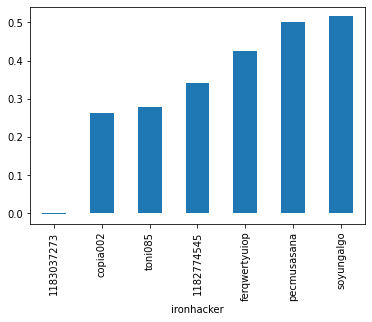

In [82]:
resumen.plot(kind="bar")

# 📚 So far:

**What we did**
- Preliminary cleaning of the lyrics
- Tokenized to keep just the words
- Translated to remove stop words
- Analyzed the sentiment
<br>

**To remember**

- There's so much more you can do with this